<a href="https://colab.research.google.com/github/vijaya-842/Assignment-1/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/diabetes (1).csv')


In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.shape


(768, 9)

# Part (a): Sample of 25 Observations

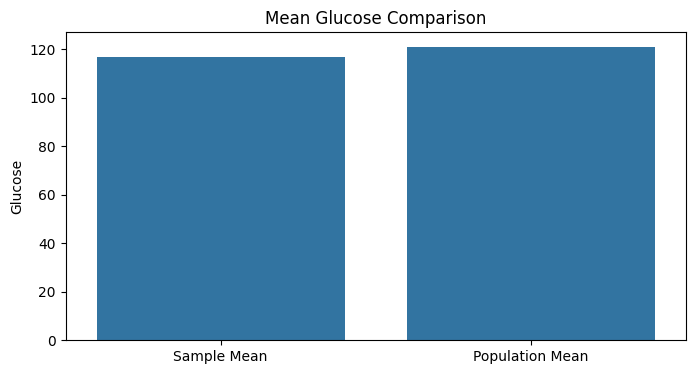

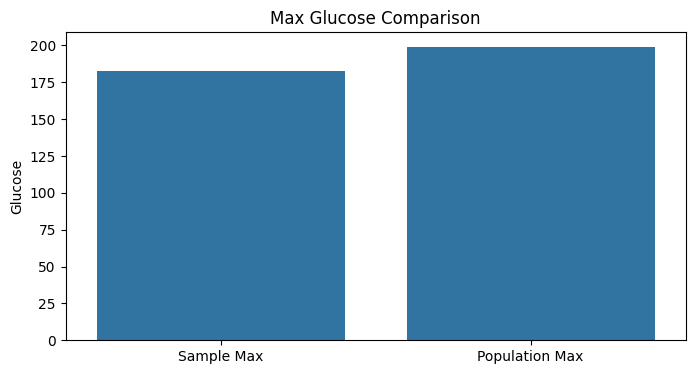

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed
np.random.seed(42)

# Take a random sample of 25 observations
sample_25 = df.sample(n=25, random_state=42)

# Glucose stats
sample_mean = sample_25['Glucose'].mean()
sample_max = sample_25['Glucose'].max()

pop_mean = df['Glucose'].mean()
pop_max = df['Glucose'].max()

# Chart: Compare mean and max
plt.figure(figsize=(8,4))
sns.barplot(x=['Sample Mean', 'Population Mean'], y=[sample_mean, pop_mean])
plt.title('Mean Glucose Comparison')
plt.ylabel('Glucose')
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(x=['Sample Max', 'Population Max'], y=[sample_max, pop_max])
plt.title('Max Glucose Comparison')
plt.ylabel('Glucose')
plt.show()

# Part (b): 98th percentile of BMI

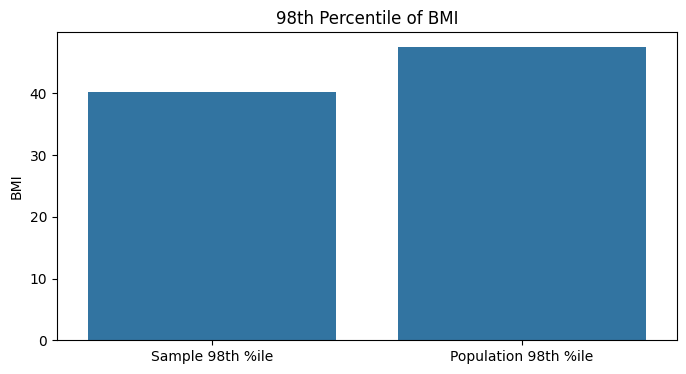

In [12]:
sample_bmi_98 = np.percentile(sample_25['BMI'], 98)
pop_bmi_98 = np.percentile(df['BMI'], 98)

# Chart
plt.figure(figsize=(8,4))
sns.barplot(x=['Sample 98th %ile', 'Population 98th %ile'], y=[sample_bmi_98, pop_bmi_98])
plt.title('98th Percentile of BMI')
plt.ylabel('BMI')
plt.show()


# Part (c): Bootstrap for BloodPressure

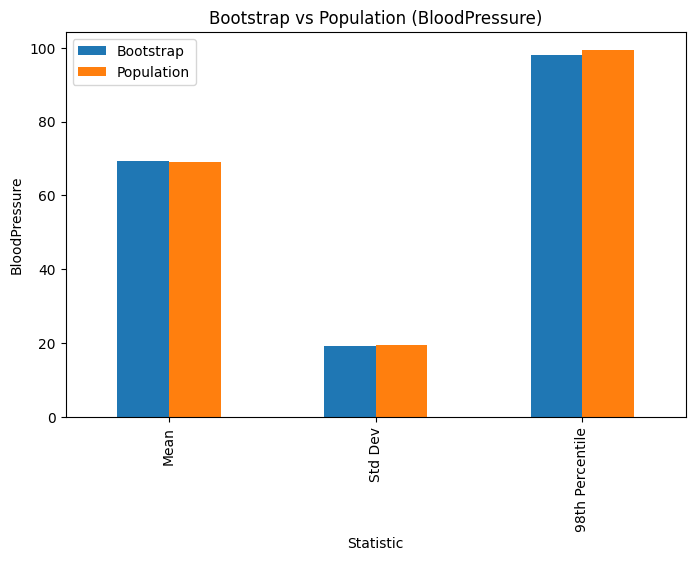

In [13]:
boot_means = []
boot_stds = []
boot_percentiles = []

for _ in range(500):
    sample = df.sample(n=150, replace=True)
    boot_means.append(sample['BloodPressure'].mean())
    boot_stds.append(sample['BloodPressure'].std())
    boot_percentiles.append(np.percentile(sample['BloodPressure'], 98))

# Aggregate bootstrap stats
boot_mean_avg = np.mean(boot_means)
boot_std_avg = np.mean(boot_stds)
boot_percentile_avg = np.mean(boot_percentiles)

# Population stats
pop_mean = df['BloodPressure'].mean()
pop_std = df['BloodPressure'].std()
pop_percentile = np.percentile(df['BloodPressure'], 98)

# Comparison charts
stats = ['Mean', 'Std Dev', '98th Percentile']
bootstrap_values = [boot_mean_avg, boot_std_avg, boot_percentile_avg]
population_values = [pop_mean, pop_std, pop_percentile]

df_compare = pd.DataFrame({'Statistic': stats, 'Bootstrap': bootstrap_values, 'Population': population_values})
df_compare.set_index('Statistic').plot(kind='bar', figsize=(8,5), title="Bootstrap vs Population (BloodPressure)")
plt.ylabel("BloodPressure")
plt.show()


# Findings
Part (a):

The sample's mean glucose was slightly lower than the population's, and the maximum value was also smaller. This shows how small samples may miss extreme values and under-represent the population range.

Part (b):

The 98th percentile BMI in the sample was slightly lower than in the population, again suggesting that rare/extreme values may be missed in smaller samples.

Part (c):

The average of 500 bootstrap samples closely matched the population statistics for BloodPressure (mean, std, and 98th percentile), proving that bootstrap is a powerful tool for estimating population parameters from samples.

Conclusion:

This analysis shows that small random samples can estimate average glucose and blood pressure fairly well but often miss extreme values like very high BMI. The 98th percentile values in the sample were lower than those in the population. Bootstrapping with larger samples gave results much closer to the population values, proving it's a useful method for estimating average and spread, even when working with limited data.

